In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [106]:
df = pd.read_csv("Real estate.csv")
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [107]:
X=df.drop(['No','Y house price of unit area'], axis=1)
y=df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [108]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.7735999969964081

In [109]:
y_pred = knn.predict(X_test)
y_pred

array([49.86, 18.2 , 40.28, 18.2 , 36.36, 37.32, 40.66, 33.4 , 45.08,
       40.74, 59.72, 43.06, 47.36, 44.6 , 63.56, 35.56, 37.62, 48.48,
       39.76, 42.36, 56.92, 40.18, 30.42, 49.54, 42.96, 44.34, 40.5 ,
       26.56, 51.5 , 30.64, 49.98, 37.28, 48.08, 37.74, 40.5 , 40.18,
       53.42, 28.7 , 53.6 , 15.26, 45.76, 45.62, 26.34, 52.18, 16.58,
       53.2 , 37.76, 16.66, 26.72, 53.82, 59.38, 37.54, 49.7 , 24.76,
       40.18, 46.62, 52.1 , 37.22, 59.72, 37.28, 35.56, 53.42, 48.8 ,
       45.08, 40.9 , 26.38, 18.2 , 24.32, 52.1 , 37.32, 30.42, 51.5 ,
       40.9 , 24.52, 39.94, 28.42, 26.98, 18.2 , 49.88, 32.18, 49.88,
       40.18, 36.22, 25.58, 25.58, 39.94, 41.6 , 25.1 , 51.5 , 47.76,
       48.48, 41.56, 40.18, 30.42, 17.1 , 40.9 , 28.18, 40.74, 16.66,
       41.6 , 48.48, 39.76, 42.5 , 32.18, 47.36, 40.18, 42.5 , 15.26,
       42.84, 18.28, 41.32, 37.54, 26.84, 37.28, 48.8 , 26.76, 43.28,
       44.6 , 39.16, 26.38, 28.42, 40.14, 40.18, 32.18, 56.92])

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 84.60930560000003
R-squared: 0.5035370934122603


In [111]:
mse_values = []
for i in range(1, 16):
    knn_i = KNeighborsRegressor(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    y_pred_i = knn_i.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_i))

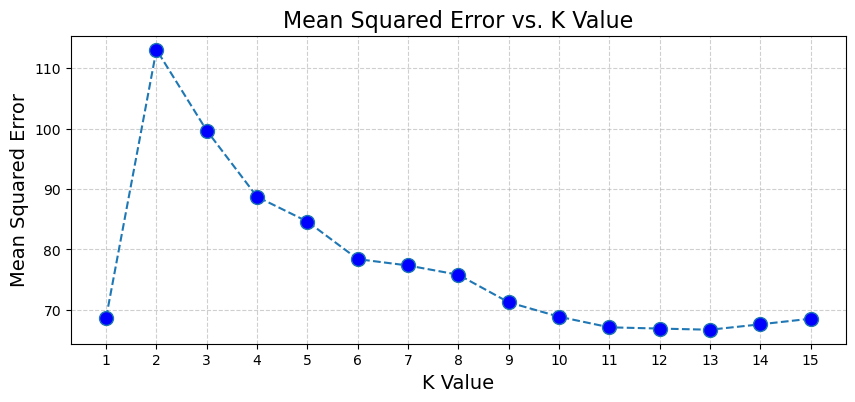

In [112]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 16), mse_values, marker='o', linestyle='dashed', markersize=10, markerfacecolor='blue')
plt.title('Mean Squared Error vs. K Value', fontsize=16)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(range(1, 16))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [113]:
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [115]:
correlation_matrix = df.corr().round(2)
correlation_matrix

No  X1 transaction date  \
No                                      1.00                -0.05   
X1 transaction date                    -0.05                 1.00   
X2 house age                           -0.03                 0.02   
X3 distance to the nearest MRT station -0.01                 0.06   
X4 number of convenience stores        -0.01                 0.01   
X5 latitude                            -0.01                 0.04   
X6 longitude                           -0.01                -0.04   
Y house price of unit area             -0.03                 0.09   

                                        X2 house age  \
No                                             -0.03   
X1 transaction date                             0.02   
X2 house age                                    1.00   
X3 distance to the nearest MRT station          0.03   
X4 number of convenience stores                 0.05   
X5 latitude                                     0.05   
X6 longitude                                   -0.05   
Y house price of unit area                     -0.21   

                                        X3 distance to the nearest MRT station  \
No                                                                       -0.01   
X1 transaction date                                                       0.06   
X2 house age                                                              0.03   
X3 distance to the nearest MRT station                                    1.00   
X4 number of convenience stores                                          -0.60   
X5 latitude                                                              -0.59   
X6 longitude                                                             -0.81   
Y house price of unit area                                               -0.67   

                                        X4 number of convenience stores  \
No                                                                -0.01   
X1 transaction date                                                0.01   
X2 house age                                                       0.05   
X3 distance to the nearest MRT station                            -0.60   
X4 number of convenience stores                                    1.00   
X5 latitude                                                        0.44   
X6 longitude                                                       0.45   
Y house price of unit area                                         0.57   

                                        X5 latitude  X6 longitude  \
No                                            -0.01         -0.01   
X1 transaction date                            0.04         -0.04   
X2 house age                                   0.05         -0.05   
X3 distance to the nearest MRT station        -0.59         -0.81   
X4 number of convenience stores                0.44          0.45   
X5 latitude                                    1.00          0.41   
X6 longitude                                   0.41          1.00   
Y house price of unit area                     0.55          0.52   

                                        Y house price of unit area  
No                                                           -0.03  
X1 transaction date                                           0.09  
X2 house age                                                 -0.21  
X3 distance to the nearest MRT station                       -0.67  
X4 number of convenience stores                               0.57  
X5 latitude                                                   0.55  
X6 longitude                                                  0.52  
Y house price of unit area                                    1.00

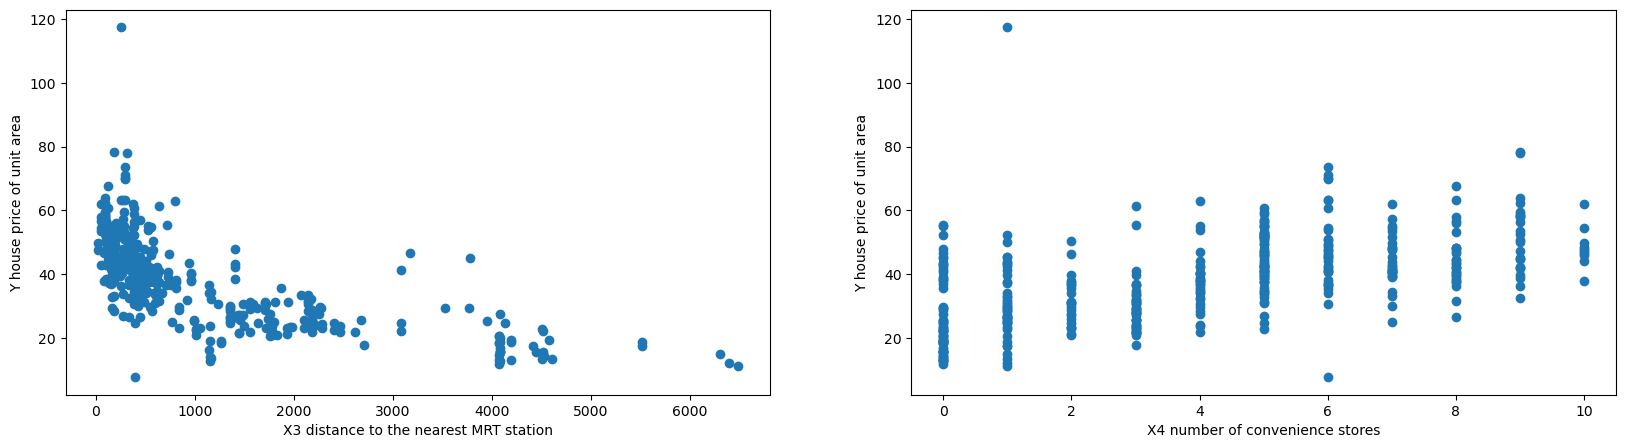

In [116]:
plt.figure(figsize=(20, 5))
feature = ['X3 distance to the nearest MRT station', 'X4 number of convenience stores']
for i, col in enumerate(feature):
    plt.subplot(1, len(feature), i + 1)
    x = df[col]
    y = df['Y house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('Y house price of unit area')
plt.show()

In [117]:
X = pd.DataFrame(np.c_[df['X3 distance to the nearest MRT station'], df['X4 number of convenience stores']], columns=['X3', 'X4'])
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 2), (83, 2), (331,), (83,))

In [118]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)
print("RMSE: {}".format(rmse))
print("R2:", r2)

RMSE: 10.078452309925485
R2: 0.48030157682457464


In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [121]:
df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [122]:
X=df.drop(['No','Y house price of unit area'], axis=1)
y=df['Y house price of unit area']

In [123]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)
poly_features.shape

(414, 27)

In [124]:
X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

Y_Test     Y_Pred  Residuals
176    19.2  16.797447   2.402553
347    11.2   5.657805   5.542195
307    24.7  21.700937   2.999063
299    46.1  47.608465  -1.508465
391    31.3  30.669807   0.630193

In [126]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)
pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

metrics
MAE    4.249533
MSE   28.538516
RMSE   5.342145

In [127]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

In [128]:
MAE_simple = metrics.mean_absolute_error(y_test,ys_pred)
MSE_simple = metrics.mean_squared_error(y_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly],
'Simple Metrics':[MAE_simple, MSE_simple,RMSE_simple]},
index=['MAE', 'MSE', 'RMSE'])


Poly Metrics  Simple Metrics
MAE       4.249533        5.392294
MSE      28.538516       46.211798
RMSE      5.342145        6.797926

In [129]:
train_RMSE_list=[] # Train List of RMSE per degree
test_RMSE_list=[] #Test List of RMSE per degree
for d in range(1,10):
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [130]:
pd.DataFrame({'Train RMSE List':train_RMSE_list, 'Test RMSE List':test_RMSE_list} )

Train RMSE List  Test RMSE List
0         9.543254        6.797926
1         8.168684        5.342145
2         7.570391        7.018653
3         7.057586       19.294931
4         6.769805       39.367815
5         6.668660      130.143209
6         6.957565      257.834926
7         6.847603     3760.842942
8         6.941205    23658.794438

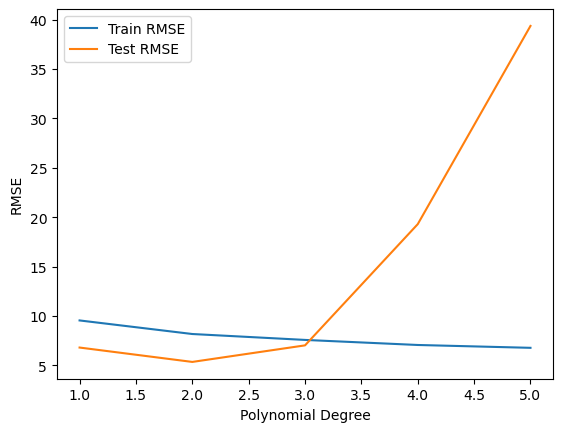

In [131]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()